In [68]:
import numpy as np
from random import randint
from random import seed
import random
from IPython.display import Markdown, clear_output
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as gkde
plt.rcParams['font.size'] = 14

%matplotlib inline
%matplotlib widget

In [45]:
T = 10 #Inventory cycle duration
h_Q = randint(1,10) #Holding cost per cycle 
Q = 6 #Order size
K = 5 #Fixed cost ($/order)
c_Q = K + h_Q
iL = Q



In [70]:
n = 10 #Number of cycles
iL = 800
Q = 1000
for i in range(n):
    display(Markdown(f"Timestep : **{i}** || iL before : **{iL}**"))
    D_r = random.randint(1, 800)
    display(Markdown(f"Demand : **{D_r}**"))
    if (iL - D_r) < 0:
        display(Markdown(f" -ve inventory alert! Placing an order of **{Q}**"))
        iL += Q
       
    iL -= D_r
    display(Markdown(f"iL after : **{iL}**"))


    
    

Timestep : **0** || iL before : **800**

Demand : **430**

iL after : **370**

Timestep : **1** || iL before : **370**

Demand : **121**

iL after : **249**

Timestep : **2** || iL before : **249**

Demand : **337**

 -ve inventory alert! Placing an order of **1000**

iL after : **912**

Timestep : **3** || iL before : **912**

Demand : **430**

iL after : **482**

Timestep : **4** || iL before : **482**

Demand : **611**

 -ve inventory alert! Placing an order of **1000**

iL after : **871**

Timestep : **5** || iL before : **871**

Demand : **496**

iL after : **375**

Timestep : **6** || iL before : **375**

Demand : **385**

 -ve inventory alert! Placing an order of **1000**

iL after : **990**

Timestep : **7** || iL before : **990**

Demand : **244**

iL after : **746**

Timestep : **8** || iL before : **746**

Demand : **624**

iL after : **122**

Timestep : **9** || iL before : **122**

Demand : **207**

 -ve inventory alert! Placing an order of **1000**

iL after : **915**

In [82]:
iL = [0] * n
iL[0] = 800
Q = 1000
for i in range(n):
    display(Markdown(f"Timestep : **{i}** || iL before : **{iL}**"))
    D_r = random.randint(1, 800)
    display(Markdown(f"Demand : **{D_r}**"))
    if (iL[i] - D_r) < 0:
        display(Markdown(f" -ve inventory alert! Placing an order of **{Q}**"))
        
        iL[i] = iL[i] + iL[i-1] + Q
    
    iL[i] = iL[i-1] - D_r
    display(Markdown(f"iL after : **{iL}**"))
print(iL)

Timestep : **1** || iL before : **[800, 0, 0, 0, 0, 0, 0, 0, 0, 0]**

Demand : **99**

iL after : **[800, 701, 0, 0, 0, 0, 0, 0, 0, 0]**

Timestep : **2** || iL before : **[800, 701, 0, 0, 0, 0, 0, 0, 0, 0]**

Demand : **521**

iL after : **[800, 701, 180, 0, 0, 0, 0, 0, 0, 0]**

Timestep : **3** || iL before : **[800, 701, 180, 0, 0, 0, 0, 0, 0, 0]**

Demand : **207**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, 0, 0, 0, 0, 0, 0]**

Timestep : **4** || iL before : **[800, 701, 180, -27, 0, 0, 0, 0, 0, 0]**

Demand : **630**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, 0, 0, 0, 0, 0]**

Timestep : **5** || iL before : **[800, 701, 180, -27, -657, 0, 0, 0, 0, 0]**

Demand : **241**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, -898, 0, 0, 0, 0]**

Timestep : **6** || iL before : **[800, 701, 180, -27, -657, -898, 0, 0, 0, 0]**

Demand : **409**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, -898, -1307, 0, 0, 0]**

Timestep : **7** || iL before : **[800, 701, 180, -27, -657, -898, -1307, 0, 0, 0]**

Demand : **281**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, -898, -1307, -1588, 0, 0]**

Timestep : **8** || iL before : **[800, 701, 180, -27, -657, -898, -1307, -1588, 0, 0]**

Demand : **16**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, -898, -1307, -1588, -1604, 0]**

Timestep : **9** || iL before : **[800, 701, 180, -27, -657, -898, -1307, -1588, -1604, 0]**

Demand : **472**

 -ve inventory alert! Placing an order of **1000**

iL after : **[800, 701, 180, -27, -657, -898, -1307, -1588, -1604, -2076]**

[800, 701, 180, -27, -657, -898, -1307, -1588, -1604, -2076]


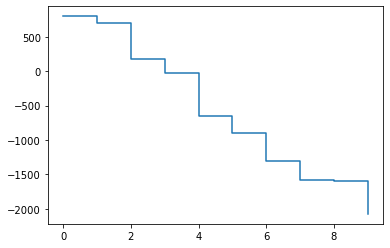

In [87]:
x =plt.step(np.arange(len(iL)),iL,where="post")

**Total Cost ($): 4495.50**

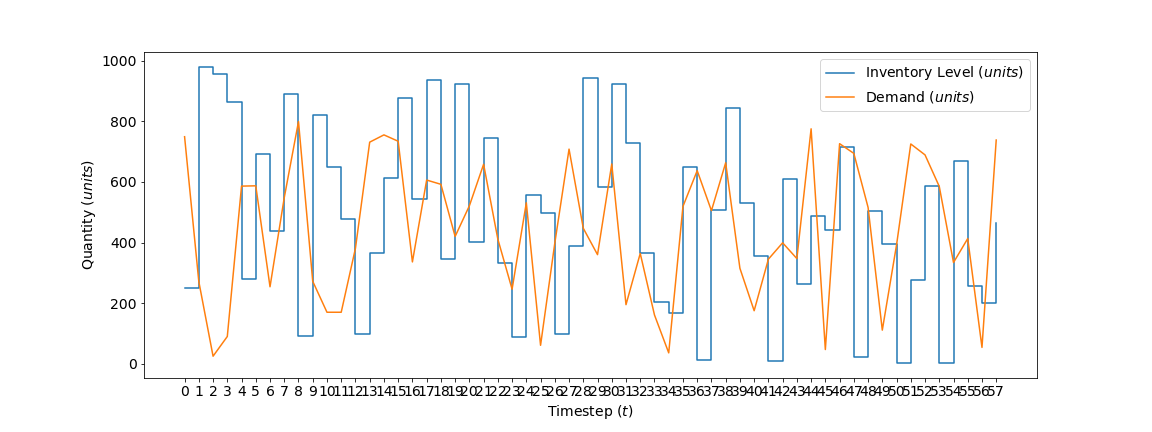

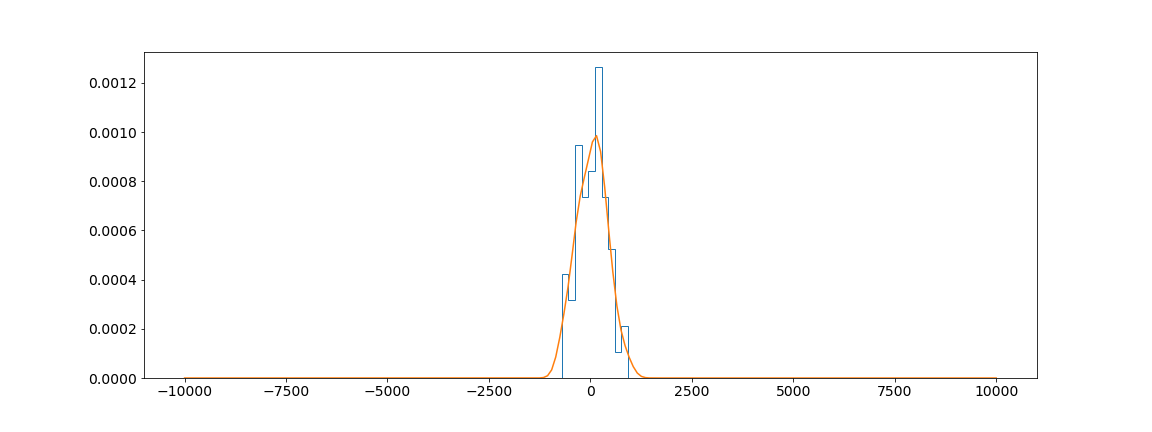

In [80]:
Q = 1000 # Ordering size
T = np.random.randint(low=10,high=100)  # Inventory cycle duration
iL = [0] * T # Inventory level per cycle
d_r = [] # Demand per cycle

K = 5 # Fixed ordering cost
H_Q = [0] # Holding cost per cycle
C_Q = [] # Total cost per cycle

for i in range(T):
    
    h = np.random.randint(low=1,high=10) # Variable holding cost (cost of capital)
    A_i = random.randint(1, 800) # Demand at ith cycle
    
    d_r.append(A_i) # Storing demand for plot
    H_Q.append(h * A_i) # Storing holding cost per cycle
    C_Q.append(K + H_Q[i]) # Storing total cost per cycle
    
    # display(Markdown(f"Demand : **{A_i}**, iL : **{iL}**"))
    
    if i == 0:
        iL[i] = Q - A_i # For the first cycle : iL = 0 , so we place an order of Q and serve the demand of A_i
    else:
        if (iL[i-1] - A_i) <= 0:
            iL[i] = (Q + iL[i-1]) - A_i # If A_i cannot be served, place an order of Q, iL += Q and then serve A_i
        else:
            iL[i] = iL[i-1] - A_i # Serve A_i from current iL

E_A = np.mean(d_r) # Mean demand
E_T = Q * E_A 
E_H_Q = h * (((Q-1) * Q)/2) * E_A
E_C_Q = K + E_H_Q
Cu_Q = (K/(Q*E_A)) + ((h * (Q-1))/2) # Annual Cost
display(Markdown(f"**Total Cost ($): {Cu_Q:.2f}**"))
            
# Plotting the demand and inventory level progression       
num = "EOQ progression"
if plt.fignum_exists(num):plt.close(num)
fig,ax = plt.subplots(num=num,figsize=(16,6))
ax.step(np.arange(len(iL)),iL,where="post", label="Inventory Level $(units)$")
ax.set(xlabel="Timestep $(t)$",ylabel="Quantity $(units)$")
ax.set_xticks(range(T))
ax.plot(d_r, label="Demand $(units)$")
ax.legend();

# Plotting the error distribution
iL = np.array(iL)
d_r = np.array(d_r)
num="Error Distribution"
if plt.fignum_exists(num):plt.close(num)
figD, axD = plt.subplots(num=num,figsize=(16,6))
axD.hist(iL-d_r,density=True,histtype="step")
kernel = gkde(iL-d_r)
x = np.linspace(-10_000,10_000,200)
axD.plot(x,kernel(x));